In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [7]:
y_train_oh = utils.to_categorical(y_train)
y_test_oh = utils.to_categorical(y_test)

In [8]:
y_train_oh.shape

(60000, 10)

In [9]:
x_train_cov = x_train.reshape(60000, 28, 28, 1)
x_test_cov = x_test.reshape(10000, 28, 28, 1)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28,28, 1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [11]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [12]:
hist = model.fit(x_train_cov, y_train_oh, validation_split=0.2, epochs = 10, batch_size=20)

Epoch 1/10
2400/2400 [==============================] - 19s 4ms/step - loss: 0.2701 - accuracy: 0.9555 - val_loss: 0.0851 - val_accuracy: 0.9748
Epoch 2/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.0657 - val_accuracy: 0.9818
Epoch 3/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.0684 - val_accuracy: 0.9803
Epoch 4/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.1041 - val_accuracy: 0.9788
Epoch 5/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.1011 - val_accuracy: 0.9814
Epoch 6/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0252 - accuracy: 0.9931 - val_loss: 0.1105 - val_accuracy: 0.9794
Epoch 7/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.1179 - val_ac

### fashion_mnist

In [20]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [21]:
print(train_input.shape)
print(train_target.shape)

(60000, 28, 28)
(60000,)


In [22]:
x_train = train_input.reshape(60000, 28 * 28)
x_test = test_input.reshape(10000, 28 * 28)
y_train = train_target
y_test = test_target

In [16]:
x_train_cov = train_input.reshape(60000, 28, 28, 1)
x_test_cov = test_input.reshape(10000, 28, 28, 1)

In [23]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [24]:
y_test_oh.shape

(10000, 10)

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               1254500   
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                      

In [29]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [30]:
hist = model.fit(x_train_cov, y_train_oh, epochs=20, batch_size=10,validation_split=0.2)

Epoch 1/20
4800/4800 [==============================] - 19s 4ms/step - loss: 0.6360 - accuracy: 0.8136 - val_loss: 0.3597 - val_accuracy: 0.8673
Epoch 2/20
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3762 - accuracy: 0.8637 - val_loss: 0.3276 - val_accuracy: 0.8798
Epoch 3/20
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3253 - accuracy: 0.8806 - val_loss: 0.3129 - val_accuracy: 0.8854
Epoch 4/20
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3000 - accuracy: 0.8886 - val_loss: 0.3236 - val_accuracy: 0.8814
Epoch 5/20
4800/4800 [==============================] - 19s 4ms/step - loss: 0.2748 - accuracy: 0.8976 - val_loss: 0.3144 - val_accuracy: 0.8916
Epoch 6/20
4387/4800 [==========================>...] - ETA: 1s - loss: 0.2543 - accuracy: 0.9043

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test-cov, y_test_oh)

### cifa10

In [31]:
from tensorflow.keras.datasets import cifar10

In [32]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


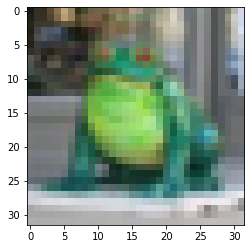

In [45]:
plt.imshow(x_train[19])

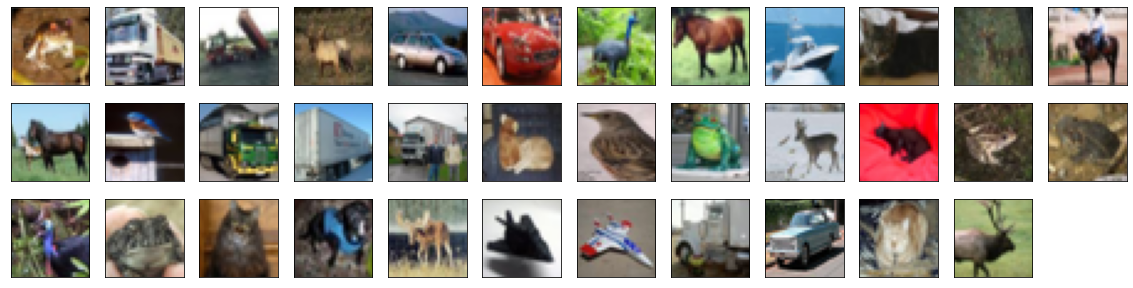

In [50]:
fig = plt.figure(figsize = (20, 5))

for i in range(35):
    ax = fig.add_subplot(3, 12, i + 1, xticks = [], yticks = [])
    ax.imshow(x_train[i])

In [54]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [56]:
y_train_oh.shape

(50000, 10)

In [58]:
model = Sequential()
model.add(Conv2D(16, kernel_size=4, activation = 'relu', input_shape=(32,32,3), padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, kernel_size=4, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        784       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)          32832     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 64)        

In [59]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [60]:
hist = model.fit(x_train, y_train_oh, validation_split=0.2, epochs=10, batch_size=10)

Epoch 1/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.7391 - accuracy: 0.3944 - val_loss: 1.4720 - val_accuracy: 0.4766
Epoch 2/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.3982 - accuracy: 0.5055 - val_loss: 1.3752 - val_accuracy: 0.5160
Epoch 3/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.2745 - accuracy: 0.5527 - val_loss: 1.2681 - val_accuracy: 0.5616
Epoch 4/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.2078 - accuracy: 0.5785 - val_loss: 1.2497 - val_accuracy: 0.5708
Epoch 5/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.1335 - accuracy: 0.6043 - val_loss: 1.1481 - val_accuracy: 0.6016
Epoch 6/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.0881 - accuracy: 0.6241 - val_loss: 1.2265 - val_accuracy: 0.5821
Epoch 7/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.0427 - accuracy: 0.6410 - val_loss: 1.1596 - val_ac

In [61]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 1.2223 - accuracy: 0.6161


[1.2223470211029053, 0.616100013256073]

In [62]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import vgg16

In [63]:
vgg_model = vgg16.VGG16(weights='imagenet')

553476096/553467096 [==============================] - 48s 0us/step


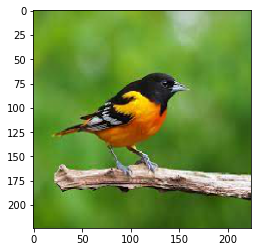

In [65]:
file_name = 'D:\Deep Learning\Data\\bird.jpg'

org = load_img(file_name, target_size = (224, 224))
img = img_to_array(org)
plt.imshow(np.uint8(img))

In [66]:
img.shape

(224, 224, 3)

In [67]:
x = np.expand_dims(img, axis = 0)
x.shape

(1, 224, 224, 3)

In [68]:
x = vgg16.preprocess_input(x)
pred = vgg_model.predict(x)
pred

array([[2.13805387e-13, 8.59719310e-11, 9.04352887e-14, 1.36379928e-14,
        1.45150128e-15, 7.46818700e-15, 3.96364155e-14, 1.32462296e-11,
        2.09506856e-10, 1.16850621e-13, 9.21441495e-01, 6.61952049e-02,
        5.41898498e-06, 1.32542118e-04, 5.14479121e-04, 5.35447616e-03,
        8.25168536e-05, 3.86231022e-06, 3.47289460e-05, 2.01579678e-05,
        2.49120145e-04, 1.44452916e-09, 1.32082843e-11, 1.12209938e-12,
        1.60841118e-10, 1.98685776e-10, 6.19079343e-10, 2.04331361e-11,
        1.47357213e-11, 4.28070421e-13, 5.01252720e-11, 3.45303786e-10,
        3.54795915e-11, 8.86737193e-15, 3.58725704e-14, 7.19286772e-13,
        1.78391364e-11, 8.78365696e-12, 9.83572273e-13, 3.91965567e-13,
        1.15645127e-09, 1.04429201e-10, 6.74812593e-12, 1.17791139e-13,
        8.40979630e-13, 1.05919559e-12, 3.53945623e-11, 1.49614383e-11,
        1.45399846e-14, 9.22854797e-14, 2.88660437e-12, 1.16552686e-15,
        7.48969550e-12, 7.58726026e-10, 5.07167875e-12, 3.483161

In [69]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

label = decode_predictions(pred)
label

49152/35363 [=========================================] - 0s 0us/step


[[('n01530575', 'brambling', 0.9214415),
  ('n01531178', 'goldfinch', 0.066195205),
  ('n01558993', 'robin', 0.005354476),
  ('n04604644', 'worm_fence', 0.00386651),
  ('n01843065', 'jacamar', 0.0020913908)]]

### brain_images

In [83]:
import PIL.Image as pilmg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout


In [72]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  rotation_range=5,
                                  zoom_range=[0.9, 2],
                                  vertical_flip=True,
                                  fill_mode='nearest')

In [75]:
train_generator = train_datagen.flow_from_directory('D:\\Deep Learning\\Data\\brainimages\\train',
                                                   target_size=(150, 150),
                                                   batch_size=5,
                                                   class_mode = 'binary')

Found 160 images belonging to 2 classes.


In [76]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [79]:
test_generator = test_datagen.flow_from_directory(
'D:\\Deep Learning\\Data\\brainimages\\test',
target_size=(150, 150),
batch_size=5,
class_mode='binary')

Found 120 images belonging to 2 classes.


In [80]:
train_generator.next()[0].shape

(5, 150, 150, 3)

In [84]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))                                              # 폴더안에 normal, ad 두 개가 있음
model.add(Activation('softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                 

In [85]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [86]:
hist = model.fit(train_generator, epochs = 20, validation_data=test_generator,
                validation_steps=20)

Epoch 1/20
32/32 [==============================] - 2s 60ms/step - loss: 0.7107 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5100
Epoch 2/20
32/32 [==============================] - 1s 28ms/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.4800
Epoch 3/20
32/32 [==============================] - 1s 29ms/step - loss: 0.6884 - accuracy: 0.5625 - val_loss: 0.6874 - val_accuracy: 0.6000
Epoch 4/20
32/32 [==============================] - 1s 27ms/step - loss: 0.6909 - accuracy: 0.5188 - val_loss: 0.6902 - val_accuracy: 0.6200
Epoch 5/20
32/32 [==============================] - 1s 27ms/step - loss: 0.6900 - accuracy: 0.5375 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 6/20
32/32 [==============================] - 1s 27ms/step - loss: 0.6759 - accuracy: 0.5813 - val_loss: 0.6930 - val_accuracy: 0.4800
Epoch 7/20
32/32 [==============================] - 1s 27ms/step - loss: 0.7185 - accuracy: 0.4938 - val_loss: 0.6923 - val_accuracy: 0.5100
Epoch 8/20
32